<a href="https://colab.research.google.com/github/VLazukina/projects_2022/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Анализ предоставленной выборки по Цифровому учебнику для оценки использования при динамическом расчете авторского вознаграждения и вознаграждения кураторов**

##**Вводные данные**:

*   Техническим специалистом представлены 7 таблиц с агрегированными данными использования Цифрового учебника (далее - Цифровой продукт)
*   Предполагается, что предоставленные данные можно использовать для динамического расчета авторского вознагражения для авторов материалов и кураторов, осуществляющих контроль за публикацией материалов в Цифровом продукте.
*   Необходимо определить достаточность и корректность предоставленных данных, принять текущий формат представления данных либо сформировать список доработок к текущему представлению данных.




In [1]:
#ИМПОРТИРУЕМ БИБЛИОТЕКИ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

**Импортируем файлы:**

In [2]:
df = pd.read_csv('/content/v_chapter_view_agg_202601201243.csv', encoding='cp1251', sep=';')

In [3]:
df_agg_daily = pd.read_csv('/content/v_chapter_view_agg_daily_202601201244.csv', encoding='cp1251', sep=';')

In [4]:
df_view_uni = pd.read_csv('/content/v_chapter_viewers_unique_202601201244.csv', encoding='cp1251', sep=';')

In [5]:
df_auth_activ = pd.read_csv('/content/v_curator_author_activity_202601201246.csv', encoding='cp1251', sep=';')

In [6]:
df_user_progress = pd.read_csv('/content/v_discipline_with_progress_user_202601201245.csv', encoding='cp1251', sep=';')

In [7]:
df_dis_user_progress = pd.read_csv('/content/v_disciplines_with_progress_user_202601201245.csv', encoding='cp1251', sep=';')

In [8]:
df_test = pd.read_csv('/content/v_passed_tests_all_users_202601201245.csv', encoding='cp1251', sep=';')

In [9]:
#С ПОМОЩЬЮ МЕТОДА DESCRIBE() ВЫВЕДЕМ ИНФОРМАЦИЮ ПО ВСЕМ ЧИСЛОВЫМ ПОЛЯМ ТАБЛИЦ, ПРЕДСТАВЛЕННЫХ ДЛЯ АНАЛИЗА
dataframes = {
    'Основной датафрейм': df,
    'Агрегация по дням': df_agg_daily,
    'Активность авторов': df_auth_activ,
    'Прогресс пользователей по дисциплинам': df_dis_user_progress,
    'Аналитика по тестам': df_test,
    'Прогресс пользователей': df_user_progress,
    'Уникальные просмотры': df_view_uni
}

# Итерируем по словарю
for name, dataframe in dataframes.items():
    print()
    print()
    print(f"=============== {name} ==================")
    print()
    display(dataframe.describe().T)



=============== Основной датафрейм ==================



,count,mean,std,min,25%,50%,75%,max
chapter_id,265.0,615.222642,203.600785,7.0,500.0,643.0,766.00,925.0
section_id,264.0,396.386364,99.213036,16.0,416.0,423.0,426.25,915.0
discipline_id,264.0,365.045455,121.975555,5.0,411.0,412.0,413.00,914.0
sessions_cnt,265.0,5.743396,6.858016,1.0,2.0,3.0,7.00,48.0
users_unique,265.0,4.339623,4.014856,1.0,2.0,3.0,5.00,25.0
time_spent_sec,265.0,4547.418868,6840.276386,600.0,1206.0,2400.0,4517.00,58839.0
avg_session_sec,265.0,694.169811,161.949246,600.0,602.0,620.0,708.00,1698.0




=============== Агрегация по дням ==================



,count,mean,std,min,25%,50%,75%,max
chapter_id,1076.0,620.158922,180.122919,7.0,506.0,624.0,765.0,925.0
section_id,1030.0,402.896117,86.829782,16.0,416.0,420.0,423.0,915.0
discipline_id,1030.0,381.271845,97.157811,5.0,411.0,411.0,412.0,914.0
sessions_cnt,1034.0,1.409091,1.072383,1.0,1.0,1.0,1.0,12.0
users_unique,1034.0,3.029014,33.096490,1.0,1.0,1.0,1.0,634.0
time_spent_sec,1034.0,1109.303675,1297.002935,600.0,600.0,612.0,1200.0,16546.0
avg_session_sec,1031.0,736.280310,353.437321,554.0,600.0,605.0,655.0,3712.0




=============== Активность авторов ==================



,count,mean,std,min,25%,50%,75%,max
discipline_id,259.0,412.459459,1.145135,411.0,411.0,412.0,414.0,414.0
author_user_id,259.0,914.301158,396.181740,3.0,730.5,793.0,858.5,2665.0
materials_created_cnt,259.0,2.691120,3.337182,1.0,1.0,2.0,3.0,39.0
materials_published_cnt,259.0,0.992278,3.690541,0.0,0.0,0.0,1.0,43.0
versions_cnt,259.0,2.042471,5.706155,0.0,0.0,0.0,2.0,58.0
updates_cnt,259.0,211.123552,836.053845,0.0,0.0,0.0,73.5,10711.0
days_since_last_publication,86.0,57.930233,18.241382,0.0,49.0,66.0,69.0,80.0
days_since_last_activity,101.0,56.990099,18.244174,0.0,49.0,64.0,68.0,84.0




=============== Прогресс пользователей по дисциплинам ==================



,count,mean,std,min,25%,50%,75%,max
s,186.0,412.026882,1.047173,411.0,411.0,412.0,413.0,414.0
sections_total,186.0,5.623656,3.141403,2.0,2.0,8.0,8.0,9.0
sections_completed,186.0,0.091398,0.356001,0.0,0.0,0.0,0.0,3.0
chapters_total,186.0,60.919355,8.436020,47.0,49.0,66.0,67.0,67.0
chapters_completed,186.0,2.591398,3.864563,0.0,1.0,1.0,3.0,22.0
user_id,186.0,1384.994624,1163.154227,1.0,684.5,767.0,2562.0,3730.0




=============== Аналитика по тестам ==================



,count,mean,std,min,25%,50%,75%,max
test_id,136.0,530.345588,304.988728,1.0,258.25,595.5,828.0,907.0
chapter_id,133.0,623.812030,179.850786,279.0,462.00,646.0,777.0,887.0
question_total,136.0,5.764706,2.425895,0.0,5.00,5.0,5.0,19.0
correct_answers,136.0,3.904412,2.791200,0.0,2.00,4.0,5.0,19.0




=============== Прогресс пользователей ==================



,count,mean,std,min,25%,50%,75%,max
discipline_id,5969.0,254.694589,220.628224,5.0,92.0,246.0,411.0,914.0
user_id,5967.0,1229.353276,905.779888,1.0,715.0,815.0,1264.0,3730.0
sections_with_content,5969.0,2.528564,2.789155,0.0,0.0,2.0,4.0,9.0
sections_completed,5969.0,0.004523,0.088628,0.0,0.0,0.0,0.0,3.0
discipline_total_chapters,5967.0,16.823529,23.522263,0.0,0.0,2.0,20.0,67.0
discipline_completed_chapters,5967.0,0.107759,0.951710,0.0,0.0,0.0,0.0,20.0
discipline_progress_percent,5967.0,0.263791,2.893067,0.0,0.0,0.0,0.0,100.0




=============== Уникальные просмотры ==================



,count,mean,std,min,25%,50%,75%,max
chapter_id,549.0,525.220401,259.858118,1.0,320.00,553.0,738.00,926.0
version_id,288.0,846.756944,295.749335,36.0,713.25,880.5,1088.25,1259.0
viewers_unique,549.0,1.533698,2.494017,0.0,0.00,0.0,2.00,14.0
saved_users_unique,549.0,0.009107,0.095084,0.0,0.00,0.0,0.00,1.0
saved_highlights_total,549.0,0.085610,1.190731,0.0,0.00,0.0,0.00,23.0


**Первичный анализ таблиц показал, что**

**Основной датафрейм по главам**:
Исходя из представленных в таблице данных:


*   **Количество сессий по главам** варьируется **от 1 до 48**, при этом **медиана = 3**, при среднем = 5,7. **75% значений лежит в диапазоне от 0 до 7**
*   **Количество ун.пользователей по главам** варьируется **от 1 до 25**, при этом **медиана = 3**, при среднем = 4,3. **75% значений лежит в диапазоне от 0 до 5 ун.пользователей**
*   **Суммарное время чтения по главам** варьируется **от 10 минут до 16 ч. 20 мин.**, при этом **медиана = 40 минут**, при среднем = **75 минут**. **75% значений лежит в диапазоне от 10 до 75 минут**
*   **Средняя продолжительность сессии по главам** варьируется **от 10 минут до 28 мин.**, при этом **медиана = 10 минут**, при среднем = **11 минут**.

**Агрегация по дням по главам**:
Исходя из представленных в таблице данных :


*   **Количество сессий по главам в день** варьируется **от 1 до 12**, при этом **медиана = 1**, при среднем = 1,4. **75% значений = 1**
*   **Количество ун.пользователей по главам в день** варьируется **от 1 до 634**, при этом **медиана = 1**, при среднем = 3. **75% значений = 1**
*   **Суммарное время чтения по главам в день** варьируется **от 10 минут до 4 ч. 35 мин.**, при этом **медиана = 10 минут**, при среднем = **18,5 минут**. **75% значений лежит в диапазоне от 10 до 20 минут**
*   **Средняя продолжительность сессии по главам в день** варьируется **от 9 минут до 61 мин.**, при этом **медиана = 10 минут**, при среднем = **12 минут**.

**Активность авторов:**
Исходя из представленных в таблице данных:

*   **Количество созданных материалов автором** варьируется **от 1 до 39**. При этом среднее 2.69, а **медиана = 2**, при этом 75% значений лежит в диапазоне от 1 до 3.
*   **Количество опубликованных материалов авторов** варьируется от **0 до 43**. При этом **медиана = 0**, **75% значений лежат в диапазоне до 1**
*   **Количество версий, созданных автором** варьируется **от 0 до 58**, при этом **медиана = 0**, при среднем = 2. **75% лежат в диапазоне до 2**
*   Количество обновлений автора варьируется **от 0 до 10711**, при этом **медиана = 66**, при среднем = 211. **75% значений лежат в диапазоне до 69**
*   **Количество дней с последней публикации и Количество дней с последней активности** варьируются от 0 до 80/84 соответственно. При этом, заполнено у 86 пользователей из 259 (33%). Это, в том числе, связано с тем, что создание материала не считается активностью, у пользователей, которые только создали материал, далее не публикуя его, поле пустое.


**Уникальные просмотры:**

Исходя из представленных в таблице данных:
*   **количество уникальных читателей** по главам варьируется от **0 до 14**. При этом, **75% значений лежит в диапазоне от 0 до 2**, **медиана = 0 уникальных пользователей**.
*   Количество уникальных пользователей, которые сохранили материал,  варьируется от **0 до 1**. **Медиана = 0 уникальных пользователей**.
*   **Количество выделений текста (для конспектов)** варьируется **от 0 до 23**, при этом **медиана = 0**.

Таблицы Аналитика по тестам и Прогресс пользователей требуют большего анализа, так как данные не полные, большинство значений = 0. Требуется их дополнительное изучение.


**Гипотезы на основе первичного анализа таблиц**:


*   Данных для полноценного анализа недостаточно, что связано с тем, что Цифровой продукт находится на стадии разработки.
*   Таблица с активностью авторов не отображает распределение ролей на авторов и кураторов, а смешивает роли и их обязанности по созданию / публикации материала.
*   Необходимо определить природу аномальных значений и выделить скрытые зависимости данных и недоработки в части выгрузки данных из БД и проверки их корректности, в том числе для дальнейшего анализа популярности глав/разделов/дисциплин, а также активности авторов/кураторов


**ПОСМОТРИМ НА КОЛИЧЕСТВО УНИКАЛЬНЫХ ДИСЦИПЛИН, СОДЕРЖАЩИХСЯ В НИХ РАЗДЕЛОВ И ГЛАВ**

In [10]:
#ПОСМОТРИМ НА КОЛИЧЕСТВО УНИКАЛЬНЫХ ДИСЦИПЛИН, СОДЕРЖАЩИХСЯ В НИХ РАЗДЕЛОВ И ГЛАВ.
discipline_chapter_counts = df.groupby(['discipline_id', 'discipline_title']).agg(
    Количество_уникальных_Разделов=('section_id', 'nunique'),
    Количество_уникальных_Глав=('chapter_id', 'nunique')
).reset_index()
discipline_chapter_counts.rename(columns={
    'discipline_id': 'ID Дисциплины',
    'discipline_title': 'Название Дисциплины'
}, inplace=True)
print()
display(discipline_chapter_counts.sort_values(by='Название Дисциплины').reset_index(drop=True))

,ID Дисциплины,Название Дисциплины,Количество_уникальных_Разделов,Количество_уникальных_Глав
0,5.0,Акушерство и гинекология,5,11
1,413.0,Акушерство и гинекология,9,43
2,411.0,Внутренние болезни,8,68
3,8.0,Онкология,1,1
4,414.0,Онкология,2,39
5,152.0,ТЕСТ,1,1
6,914.0,Тест,1,1
7,93.0,Тест создания учебника 3,1,1
8,286.0,Тесты от менеджера проекта,2,3
9,246.0,Тесты от разработчиков,4,21


In [11]:
#Удалим тестовые данные
test_disciplines = ['ТЕСТ', 'Тест', 'Тест создания учебника', 'Тест создания учебника 3', 'Тесты от менеджера проекта', 'Тесты от разработчиков', 'Тест от КК', 'Тест создания учебника 2']
df_cleaned = df[~df['discipline_title'].isin(test_disciplines)]

In [12]:
#ПОСМОТРИМ НА КОЛИЧЕСТВО УНИКАЛЬНЫХ ДИСЦИПЛИН, СОДЕРЖАЩИХСЯ В НИХ РАЗДЕЛОВ И ГЛАВ БЕЗ ТЕСТОВЫХ ДАННЫХ
discipline_chapter_counts = df_cleaned.groupby(['discipline_id', 'discipline_title']).agg(
    Количество_уникальных_Разделов=('section_id', 'nunique'),
    Количество_уникальных_Глав=('chapter_id', 'nunique')
).reset_index()
discipline_chapter_counts.rename(columns={
    'discipline_id': 'ID Дисциплины',
    'discipline_title': 'Название Дисциплины'
}, inplace=True)
print()
display(discipline_chapter_counts.sort_values(by='Название Дисциплины').reset_index(drop=True))

,ID Дисциплины,Название Дисциплины,Количество_уникальных_Разделов,Количество_уникальных_Глав
0,5.0,Акушерство и гинекология,5,11
1,413.0,Акушерство и гинекология,9,43
2,411.0,Внутренние болезни,8,68
3,8.0,Онкология,1,1
4,414.0,Онкология,2,39
5,412.0,Хирургия,2,66
6,9.0,ЭКГ,5,9


**Анализ таблицы показывает, что:**


*   **Имеются дублирующие записи** (по информации технического специалиста некоторые ID ДИСЦИПЛИН устарели - рекомендация поставить условие в SQL: WHERE is_active = True)
*   **Необходимо почистить таблицу от тестовых данных** (ТЕСТ, Тест, Тест создания учебника 3, Тесты от менеджера проекта, Тесты от разработчиков)
*   **Всего в Цифровом продукте 5 действующих дисциплин**:

      1.   Акушерство и гинекология
      2.   Внутренние болезни
      3.   Онкология
      4.   Хирургия
      5.   ЭКГ

**ПОСМОТРИМ НА ДАННЫЕ ПО АКТИВНОСТИ АВТОРОВ (ПО ДИСЦИПЛИНАМ):**





In [13]:
#ПОСМОТРИМ НА ДАННЫЕ ПО АКТИВНОСТИ АВТОРОВ (ПО ДИСЦИПЛИНАМ)
grouped_df_auth_activ = df_auth_activ.groupby(['discipline_id', 'discipline_title']).agg(
    unique_authors=('author_user_id', 'nunique'),
    total_materials_created=('materials_created_cnt', 'sum'),
    total_materials_published=('materials_published_cnt', 'sum')
).reset_index()

grouped_df_auth_activ['published_to_created_ratio'] = round((grouped_df_auth_activ['total_materials_published'] / grouped_df_auth_activ['total_materials_created']) * 100, 2)

# Переименуем столбцы
grouped_df_auth_activ.rename(columns={
    'discipline_title': 'Дисциплина',
    'total_materials_created': 'Количество созданных материалов',
    'unique_authors': 'Количество уникальных авторов',
    'total_materials_published': 'Количество опубликованных материалов',
    'published_to_created_ratio': 'Процент опубликованных материалов'
}, inplace=True)
print()
display(grouped_df_auth_activ)

,discipline_id,Дисциплина,Количество уникальных авторов,Количество созданных материалов,Количество опубликованных материалов,Процент опубликованных материалов
0,411,Внутренние болезни,70,233,69,29.61
1,412,Хирургия,67,199,69,34.67
2,413,Акушерство и гинекология,55,159,52,32.70
3,414,Онкология,67,106,67,63.21


**Активность авторов по дисциплинам не содержит информацию по дисциплине ЭКГ**. Что говорит о том, что:
*   материалы по данной дисциплине не загружены в Цифровой продукт
*   либо выгрузка по данной дисциплине не осуществлена (техническая ошибка).

**Количество авторов по дисциплинам практически одинаковое от 55 до 70 авторов, дополнительной визуализации не требуется.**

**ВИЗУАЛИЗИРУЕМ ПОЛУЧЕННЫЕ ДАННЫЕ**

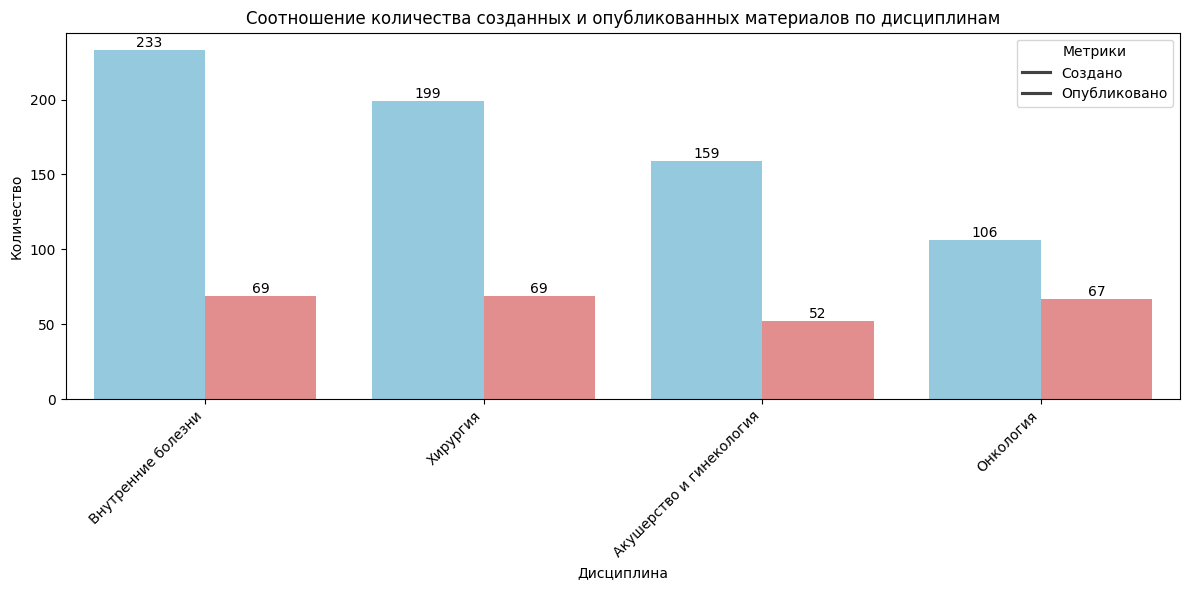

In [14]:
# Подготовим данные для графика о соотношении созданных и опубликованных материалов
df_plot = grouped_df_auth_activ[['Дисциплина', 'Количество созданных материалов', 'Количество опубликованных материалов']]
df_plot_melted = df_plot.melt(id_vars='Дисциплина', var_name='Метрики', value_name='Количество')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Дисциплина', y='Количество', hue='Метрики', data=df_plot_melted, palette={'Количество созданных материалов': 'skyblue', 'Количество опубликованных материалов': 'lightcoral'})
plt.title('Соотношение количества созданных и опубликованных материалов по дисциплинам')
plt.xlabel('Дисциплина')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Метрики', labels=['Создано', 'Опубликовано'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()

*   Несмотря на то, что **по дисциплине "Внутренние болезни" большее количество созданных материалов (233), количество опубликованных материалов не превышает показателей иных дисциплин и процент публикации самый низкий (29,6%)**
*   Несмотря на то, что **по дисциплине "Онкология" наименьшее количество созданных материалов (106), количество опубликованных материалов практически наравне с дисциплинами "Внутренние болезни" и "Хирургия", а процент публикации самый высокий (63,2%)** - практически в 2 (два) раза превышает показатели по иным дисциплинам.


**ТЕПЕРЬ ПОСМОТРИМ НА ОБЩЕЕ КОЛИЧЕСТВО АВТОРОВ И КОЛИЧЕСТВО АВТОРОВ, ЗАДЕЙСТВОВАННЫХ В НЕСКОЛЬКИХ ДИСЦИПЛИНАХ**



In [15]:
#ПОСМОТРИМ НА ОБЩЕЕ КОЛИЧЕСТВО АВТОРОВ И КОЛИЧЕСТВО АВТОРОВ, ЗАДЕЙСТВОВАНЫХ В НЕСКОЛЬКИХ ДИСЦИПЛИНАХ
total_unique_authors = df_auth_activ['author_user_id'].nunique()
print()
print(f"Общее количество уникальных авторов: {total_unique_authors}")


authors_in_multiple_disciplines = df_auth_activ.groupby('author_user_id')['discipline_id'].nunique()
authors_multiple_disciplines_count = authors_in_multiple_disciplines[authors_in_multiple_disciplines > 1].count()
print()
print(f"Количество авторов, задействованных в нескольких дисциплинах: {authors_multiple_disciplines_count}")


Общее количество уникальных авторов: 240

Количество авторов, задействованных в нескольких дисциплинах: 18


**Из 240 авторов - 18 авторов (7,5%) задействованы в нескольких дисциплинах, посмотрим, какие дисциплины чаще всего берут авторы параллельно.**

In [17]:
# Сгруппируем данные по авторам и их специализации.
authors_discipline_counts = df_auth_activ.groupby('author_user_id')['discipline_id'].nunique()

# Посчитает количество дисциплин по авторам, в работу по которым они вовлечены
discipline_involvement_summary = authors_discipline_counts.value_counts().sort_index()

# Конвертируем в DF и переименуем столбцы
discipline_involvement_df = discipline_involvement_summary.reset_index()
discipline_involvement_df.columns = ['Количество дисциплин', 'Количество авторов']

print("Количество авторов по количеству задействованных дисциплин:")
display(discipline_involvement_df)
print()

# Идентифицируем авторов, работающих в нескольких дисциплинах
multidisc_authors_ids = authors_discipline_counts[authors_discipline_counts > 1].index

# Отфильтруем исходный файл по данным авторам
df_multidisc_authors = df_auth_activ[df_auth_activ['author_user_id'].isin(multidisc_authors_ids)]

# Перед слиянием выберем соответствующие столбцы и удалим дубликаты, чтобы избежать лишних строк.
df_multidisc_authors_disciplines = df_multidisc_authors[['author_user_id', 'discipline_id', 'discipline_title']].drop_duplicates()
df_chapters_info = df[['chapter_id', 'chapter_title', 'discipline_id']].drop_duplicates(subset=['chapter_id', 'discipline_id'])

# Сгруппируем по авторам и сформируем по каждому автору список с дисцисплинами, по которым он задействован
final_summary_df = df_multidisc_authors_disciplines.groupby('author_user_id')['discipline_title'].apply(lambda x: x.unique().tolist()).reset_index()

# Переименуем столбцы
final_summary_df.rename(columns={
    'author_user_id': 'ID АВТОРА',
    'discipline_title': 'Дисциплины'
}, inplace=True)

print("Таблица авторов, задействованных в нескольких дисциплинах:")
display(final_summary_df.sort_values(by = 'ID АВТОРА').reset_index(drop=True))

Количество авторов по количеству задействованных дисциплин:


,Количество дисциплин,Количество авторов
0,1,222
1,2,17
2,3,1



Таблица авторов, задействованных в нескольких дисциплинах:


,ID АВТОРА,Дисциплины
0,3,"[Акушерство и гинекология, Онкология, Хирургия]"
1,551,"[Онкология, Хирургия]"
2,669,"[Онкология, Хирургия]"
3,684,"[Внутренние болезни, Онкология]"
4,742,"[Онкология, Хирургия]"
5,753,"[Онкология, Хирургия]"
6,758,"[Онкология, Хирургия]"
7,767,"[Онкология, Хирургия]"
8,770,"[Онкология, Хирургия]"
9,771,"[Онкология, Хирургия]"


**Исходя из полученных данных**:


*   17 авторов задействованы в 2 (двух) дисциплинах, а 1 автор в 3 (трех) дисциплинах.
*   Большинство авторов, из тех, кто взял параллельно несколько дисциплин, берут Онкологию и Хирургию.

**ПОСМОТРИМ НА ДИНАМИКУ СЕССИЙ И КОЛИЧЕСТВА УНИКАЛЬНЫХ ПОЛЬЗОВАТЕЛЕЙ ПО МЕСЯЦАМ**








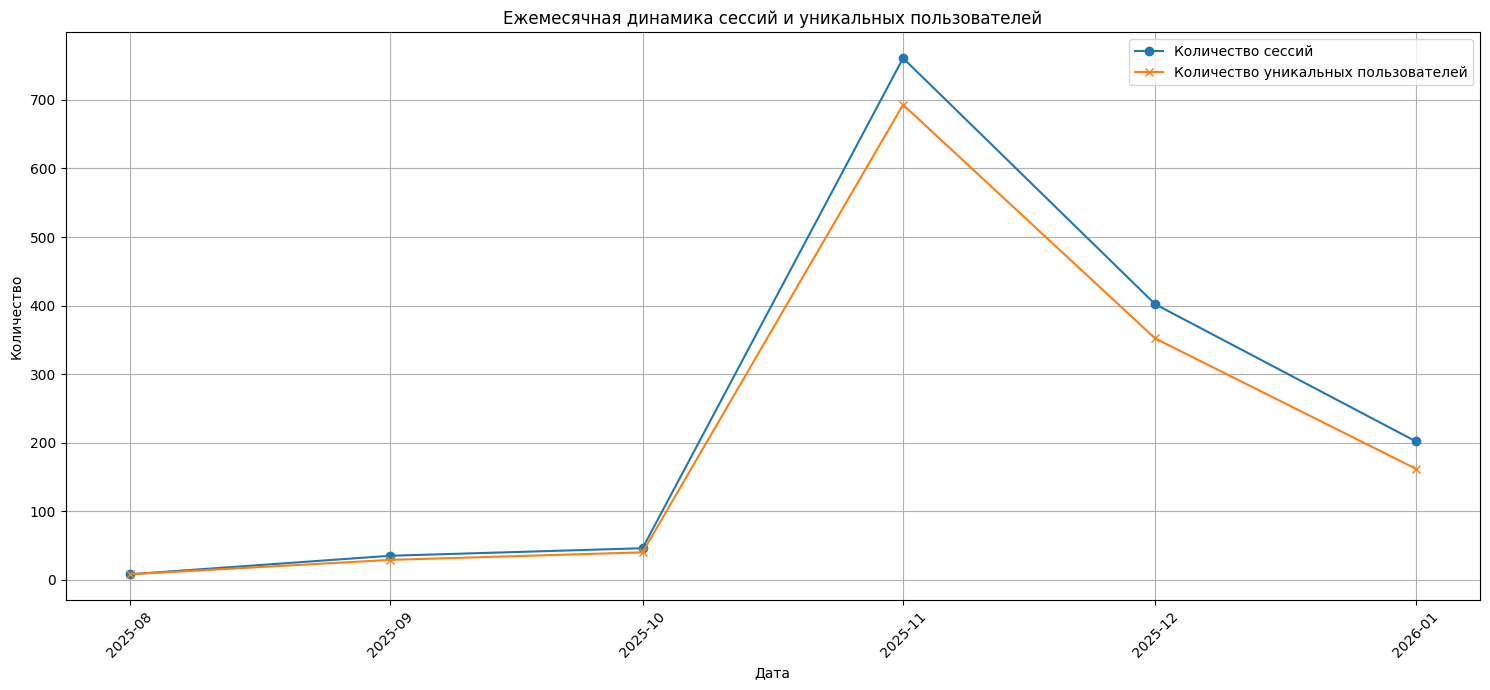

In [18]:
# Убедимся, что столбец 'day' является типом datetime
df_agg_daily['date'] = pd.to_datetime(df_agg_daily['day'], format='%d.%m.%Y')

# Установим 'date' в качестве индекса для временного ряда
df_agg_daily_indexed = df_agg_daily.set_index('date')

# Агрегируем данные по месяцам, суммируя количество сессий и уникальных пользователей
monthly_summary = df_agg_daily_indexed.resample('MS').agg({
    'sessions_cnt': 'sum',
    'users_unique': 'sum'
}).fillna(0)

# Построим график
plt.figure(figsize=(15, 7))
plt.plot(monthly_summary.index, monthly_summary['sessions_cnt'], label='Количество сессий', marker='o', markersize=6)
plt.plot(monthly_summary.index, monthly_summary['users_unique'], label='Количество уникальных пользователей', marker='x', markersize=6)

plt.title('Ежемесячная динамика сессий и уникальных пользователей')
plt.xlabel('Дата')
plt.ylabel('Количество')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**В таблице представлены данные за август 2025 - январь 2026 года**, наибольшая активность наблюдается в ноябре 2025 года.

Посмотрим, действительно ли наибольшие цифры в ноябре, и в каких днях.




DAU по дням :


,Дата,Количество уник.пользователей
48,2025-11-14,66.0
44,2025-11-10,56.0
41,2025-11-07,52.0
39,2025-11-05,42.0
87,2025-12-26,42.0
49,2025-11-15,41.0
65,2025-12-02,38.0
58,2025-11-25,37.0
46,2025-11-12,35.0
47,2025-11-13,34.0


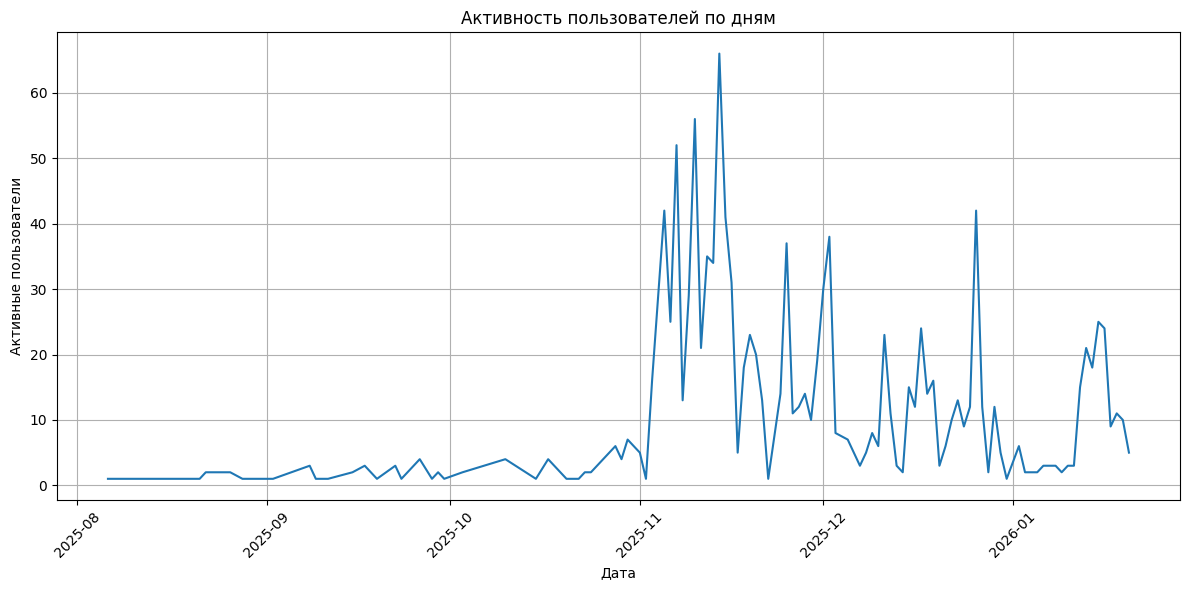

In [19]:
daily_dau = df_agg_daily.groupby('date')['users_unique'].sum().reset_index()
daily_dau.rename(columns={'date': 'Дата', 'users_unique': 'Количество уник.пользователей'}, inplace=True)

print("DAU по дням :")
display(daily_dau.sort_values(by = 'Количество уник.пользователей', ascending = False).head(10))


plt.figure(figsize=(12, 6))
sns.lineplot(x='Дата', y='Количество уник.пользователей', data=daily_dau)
plt.title('Активность пользователей по дням')
plt.xlabel('Дата')
plt.ylabel('Активные пользователи')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Исходя из представленных данных, из 10 дней с максимальным количеством посещений пользователями, 8 из них - в ноябре и 2 - в декабре**. Что, скорее всего обусловлено предоставлением доступа тестовым пользователям.

Необходимо уточнить у менеджера продукта, с какой даты следует выгружать статистику по Цифровому продукту.

Исходя из имеющейся информации, **период до ноября 2025 года** - не объективен для анализа активности пользователей, так как в том числе имеет большое количество тестовых данных. Гипотеза: возможно, за этот период до ноября 2025 года осуществлялась активная деятельность авторов/кураторов и период следует ограничить не для всех таблиц.

In [21]:
#очистим тестове данные по дисциплинам
df_user_progress_cleaned = df_user_progress[~df_user_progress['discipline_title'].isin(test_disciplines)]
df_user_progress_cleaned = df_user_progress_cleaned.dropna(subset=['user_id'])
df_user_progress_cleaned['user_id'] = df_user_progress_cleaned['user_id'].astype(int)

print("Размер исходного df_user_progress:", df_user_progress.shape)
print("Размер очищенного df_user_progress:", df_user_progress_cleaned.shape)
print("Информация об очищенном df_user_progress после преобразования типов:")
df_user_progress_cleaned.info()

Размер исходного df_user_progress: (5969, 8)
Размер очищенного df_user_progress: (3159, 8)
Информация об очищенном df_user_progress после преобразования типов:
<class 'pandas.core.frame.DataFrame'>
Index: 3159 entries, 0 to 5968
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   discipline_id                  3159 non-null   int64  
 1   discipline_title               3159 non-null   object 
 2   user_id                        3159 non-null   int64  
 3   sections_with_content          3159 non-null   int64  
 4   sections_completed             3159 non-null   int64  
 5   discipline_total_chapters      3159 non-null   float64
 6   discipline_completed_chapters  3159 non-null   float64
 7   discipline_progress_percent    3159 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 222.1+ KB


In [33]:
#ПОСМОТРИМ ПО ДИСЦИПЛИНАМ СРЕДНЕЕ КОЛИЧЕСТВО ЗАВЕРШЕННЫХ ГЛАВ
discipline_overall_progress = df_user_progress_cleaned.groupby(['discipline_title']).agg(
    ср_количество_завершенных_разделов=('sections_completed', 'mean'),
    ср_количество_завершенных_глав=('discipline_completed_chapters', 'mean'),
    доля_завершенных_разделов=('sections_completed', lambda x: ((x / df_user_progress_cleaned.loc[x.index, 'sections_with_content']).replace([np.inf, -np.inf], np.nan).mean() * 100).round(2)),
    доля_завершенных_глав=('discipline_completed_chapters', lambda x: ((x / df_user_progress_cleaned.loc[x.index, 'discipline_total_chapters']).replace([np.inf, -np.inf], np.nan).mean() * 100).round(2))
).reset_index()

print("Метрики прогресса пользователей по дисциплинам:")
display(discipline_overall_progress.head())

Метрики прогресса пользователей по дисциплинам:


,discipline_title,ср_количество_завершенных_разделов,ср_количество_завершенных_глав,доля_завершенных_разделов,доля_завершенных_глав
0,Акушерство и гинекология,0.014245,0.145299,0.17,0.40
1,Внутренние болезни,0.028490,0.811966,0.36,1.23
2,Онкология,0.001425,0.096866,0.07,0.27
3,Хирургия,0.000000,0.132004,0.00,0.30
4,ЭКГ,0.000000,0.019943,0.00,0.17


**ВИЗУАЛИЗИРУЕМ ПРЕДСТАВЛЕННЫЕ ДАННЫЕ**

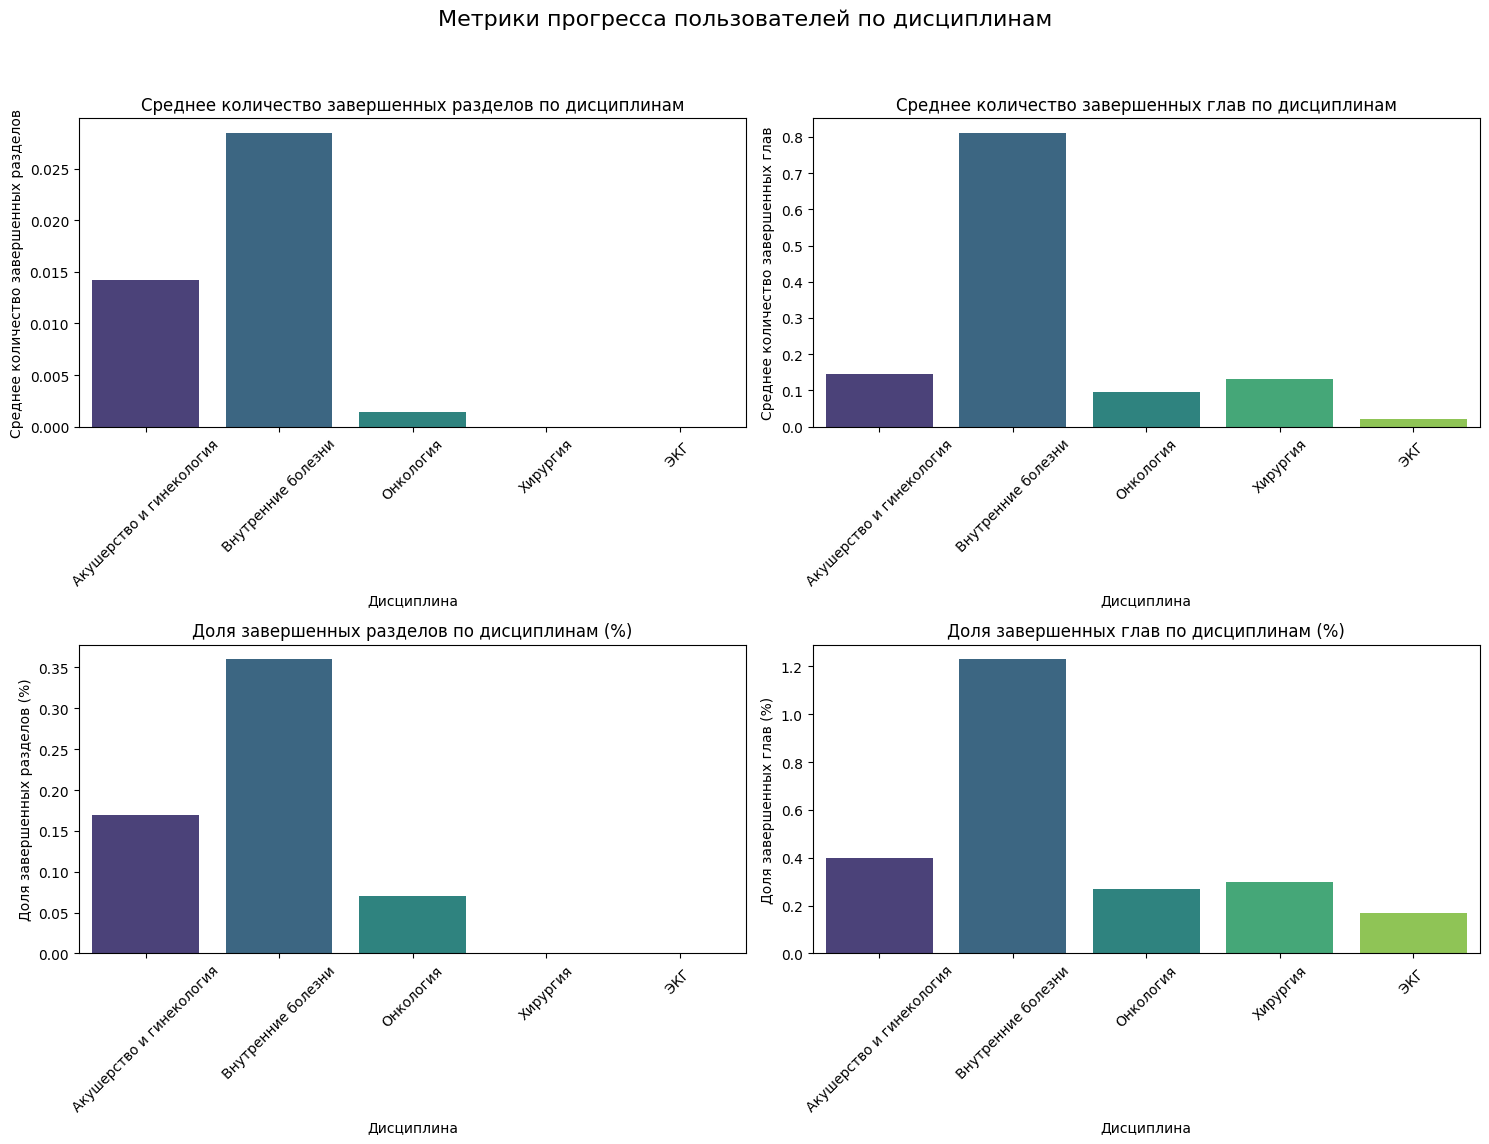

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Среднее количество завершенных разделов
sns.barplot(x='discipline_title', y='ср_количество_завершенных_разделов', data=discipline_overall_progress, palette='viridis', hue='discipline_title', legend=False, ax=ax[0, 0])
ax[0, 0].set_title('Среднее количество завершенных разделов по дисциплинам')
ax[0, 0].set_xlabel('Дисциплина')
ax[0, 0].set_ylabel('Среднее количество завершенных разделов')
ax[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Среднее количество завершенных глав
sns.barplot(x='discipline_title', y='ср_количество_завершенных_глав', data=discipline_overall_progress, palette='viridis', hue='discipline_title', legend=False, ax=ax[0, 1])
ax[0, 1].set_title('Среднее количество завершенных глав по дисциплинам')
ax[0, 1].set_xlabel('Дисциплина')
ax[0, 1].set_ylabel('Среднее количество завершенных глав')
ax[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Доля завершенных разделов (%)
sns.barplot(x='discipline_title', y='доля_завершенных_разделов', data=discipline_overall_progress, palette='viridis', hue='discipline_title', legend=False, ax=ax[1, 0])
ax[1, 0].set_title('Доля завершенных разделов по дисциплинам (%)')
ax[1, 0].set_xlabel('Дисциплина')
ax[1, 0].set_ylabel('Доля завершенных разделов (%)')
ax[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Доля завершенных глав (%)
sns.barplot(x='discipline_title', y='доля_завершенных_глав', data=discipline_overall_progress, palette='viridis', hue='discipline_title', legend=False, ax=ax[1, 1])
ax[1, 1].set_title('Доля завершенных глав по дисциплинам (%)')
ax[1, 1].set_xlabel('Дисциплина')
ax[1, 1].set_ylabel('Доля завершенных глав (%)')
ax[1, 1].tick_params(axis='x', rotation=45)

# Overall title and layout adjustment
plt.suptitle('Метрики прогресса пользователей по дисциплинам', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Исходя их анализа, выделим следующее:**
- Ни по одной дисциплине среднее значение количества завершенных глав и разделов не превысило 1.
- Самая высокая доля завершенных глав по дисциплине "Внутренние болезни" - 1,23%
- Анализ данной таблицы - еще одно доказательство того, что данных недостаточно для того, чтобы в полной мере оценить востребованность Цифрового продукта, а также вклад авторов и кураторов в продукт.

**ПОСМОТРИМ НА ТАБЛИЦУ df_view_uni, ОТРАЖАЮЩУЮ профиль главы по уникальным читателям + сохранения/выделения + иерархия.**

In [40]:
df_disciplines = df[['chapter_id', 'discipline_id', 'discipline_title']].drop_duplicates()
df_merged = pd.merge(df_view_uni, df_disciplines, on='chapter_id', how='left')

print("Объединенный DataFrame df_merged (первые 5 строк):")
display(df_merged.head())
print("\nИнформация об объединенном DataFrame df_merged:")
df_merged.info()

Объединенный DataFrame df_merged (первые 5 строк):


,chapter_id,chapter_title,chapter_user_ids,version_id,viewers_unique,saved_users_unique,saved_highlights_total,parent_chain_ids,section_titles,discipline_id,discipline_title
0,437,СЕПСИС,{551},NaN,0,0,0,"{422,412}",{},NaN,NaN
1,13,chapter 1,NaN,NaN,0,0,0,{},{},NaN,NaN
2,14,chapter 1,NaN,NaN,0,0,0,{},{},NaN,NaN
3,15,chapter 1,NaN,NaN,0,0,0,{12},{},NaN,NaN
4,280,Родовой травматизм матери и плода,{4},464.0,4,0,0,"{277,5}",{},5.0,Акушерство и гинекология



Информация об объединенном DataFrame df_merged:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   chapter_id              549 non-null    int64  
 1   chapter_title           414 non-null    object 
 2   chapter_user_ids        524 non-null    object 
 3   version_id              288 non-null    float64
 4   viewers_unique          549 non-null    int64  
 5   saved_users_unique      549 non-null    int64  
 6   saved_highlights_total  549 non-null    int64  
 7   parent_chain_ids        549 non-null    object 
 8   section_titles          549 non-null    object 
 9   discipline_id           249 non-null    float64
 10  discipline_title        249 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 47.3+ KB


**У некоторых глав отсутствует взаимосвязь с дисциплиной.**
Требуется консультация с менеджером продукта.

In [41]:
#очистим от тестовых данных
df_merged_cleaned = df_merged[~df_merged['discipline_title'].isin(test_disciplines)]

print("Размер исходного df_merged:", df_merged.shape)
print("Размер очищенного df_merged_cleaned:", df_merged_cleaned.shape)
print("Информация об очищенном df_merged_cleaned:")
display(df_merged_cleaned.head())
df_merged_cleaned.info()

Размер исходного df_merged: (549, 11)
Размер очищенного df_merged_cleaned: (527, 11)
Информация об очищенном df_merged_cleaned:


,chapter_id,chapter_title,chapter_user_ids,version_id,viewers_unique,saved_users_unique,saved_highlights_total,parent_chain_ids,section_titles,discipline_id,discipline_title
0,437,СЕПСИС,{551},NaN,0,0,0,"{422,412}",{},NaN,NaN
1,13,chapter 1,NaN,NaN,0,0,0,{},{},NaN,NaN
2,14,chapter 1,NaN,NaN,0,0,0,{},{},NaN,NaN
3,15,chapter 1,NaN,NaN,0,0,0,{12},{},NaN,NaN
4,280,Родовой травматизм матери и плода,{4},464.0,4,0,0,"{277,5}",{},5.0,Акушерство и гинекология


<class 'pandas.core.frame.DataFrame'>
Index: 527 entries, 0 to 548
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   chapter_id              527 non-null    int64  
 1   chapter_title           393 non-null    object 
 2   chapter_user_ids        502 non-null    object 
 3   version_id              266 non-null    float64
 4   viewers_unique          527 non-null    int64  
 5   saved_users_unique      527 non-null    int64  
 6   saved_highlights_total  527 non-null    int64  
 7   parent_chain_ids        527 non-null    object 
 8   section_titles          527 non-null    object 
 9   discipline_id           227 non-null    float64
 10  discipline_title        227 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 49.4+ KB


**Составим сводную таблицу по уникальным просмотрам, пользователям, сохранившим материал, выделениям текста**

In [44]:
discipline_summary = df_merged_cleaned.groupby('discipline_title').agg(
    total_viewers_unique=('viewers_unique', 'sum'),
    total_saved_users=('saved_users_unique', 'sum'),
    total_saved_highlights=('saved_highlights_total', 'sum'),
    unique_chapters=('chapter_id', 'nunique')
).reset_index()

discipline_summary.rename(columns={
    'discipline_title': 'Дисциплина',
    'total_viewers_unique': 'Всего уникальных просмотров',
    'total_saved_users': 'Всего уник.пользователей, сохранивших материал',
    'total_saved_highlights': 'Всего сохраненных выделений текста',
    'unique_chapters': 'Количество уникальных глав'
}, inplace=True)

print("Сводная таблица по уникальным просмотрам, сохраненным пользователям и выделениям текста по дисциплинам:")
display(discipline_summary)

Сводная таблица по уникальным просмотрам, сохраненным пользователям и выделениям текста по дисциплинам:


,Дисциплина,Всего уникальных просмотров,"Всего уник.пользователей, сохранивших материал",Всего сохраненных выделений текста,Количество уникальных глав
0,Акушерство и гинекология,173,0,0,54
1,Внутренние болезни,347,3,45,66
2,Онкология,59,0,0,40
3,Хирургия,175,0,0,63
4,ЭКГ,18,1,1,4


**Больше всего уникальных просмотров по дисциплине Внутренние болезни (347), а также сохранений и выделений текста.**

Потребуется уточнить у менеджера продукта, что считается просмотром, является ли просмотром заход в материал самого автора или куратора. Это позволит оценить объективность представленных данных.

In [51]:
#посмотрим аналогичную статистику по главам
chapter_summary = (df_merged_cleaned.groupby(['chapter_title', 'discipline_title']).agg(
    total_viewers_unique=('viewers_unique', 'sum'),
    total_saved_users=('saved_users_unique', 'sum'),
    total_saved_highlights=('saved_highlights_total', 'sum'))
).reset_index()

chapter_summary.rename(columns={
    'chapter_title': 'Глава',
    'discipline_title': 'Дисциплина',
    'total_viewers_unique': 'Всего уникальных просмотров',
    'total_saved_users': 'Всего уникальных сохранивших пользователей',
    'total_saved_highlights': 'Всего сохраненных выделений текста'
}, inplace=True)

print("Сводная таблица по уникальным просмотрам, сохраненным пользователям и выделениям текста по главам:")
display(chapter_summary.sort_values(by = 'Всего уникальных просмотров', ascending= False).reset_index(drop=True))

Сводная таблица по уникальным просмотрам, сохраненным пользователям и выделениям текста по главам:


,Глава,Дисциплина,Всего уникальных просмотров,Всего уникальных сохранивших пользователей,Всего сохраненных выделений текста
0,Вторичная (симптоматическая) артериальная гипертензия,Внутренние болезни,14,0,0
1,Инфекционный эндокардит,ЭКГ,14,1,1
2,Инфекционный эндокардит,Внутренние болезни,14,0,0
3,Гастроэзофагеальная рефлюксная болезнь (ГЭРБ),Внутренние болезни,13,0,0
4,Хроническая сердечная недостаточность,Внутренние болезни,12,0,0
...,...,...,...,...,...
217,Первично-множественные опухоли,Онкология,0,0,0
218,Физиология и патология пре- и постменопаузы,Акушерство и гинекология,0,0,0
219,Тестовая тема 2,ЭКГ,0,0,0
220,Хронические заболевания печени,Внутренние болезни,0,0,0


**Если смотреть статистику по главам, то**:


*   Количество просмотров не велико, но большинство из них в дисциплинах Внутренние болезни и ЭКГ. **Максимальное количество просмотров за период - 14**
*   **Наблюдается дублирование Глав в двух дисциплинах** (см. Инфекционный эндокардит в дисциплинах ЭКГ и Внутренние болезни (необходимо проверить на дублирование материала).
*   Необходима отчистка от тестовых данных не только в названиях дисциплин, но и глав соответственно.



# **Предварительные выводы**

Анализ представленных таблиц приводит к следующим выводам:

**ФОРМИРОВАНИЕ ВЫГРУЗКИ**
*   При выгрузке данных из БД требуется отчистка от тестовых данных, а также дисциплин, WHERE is_active != True
*   При формировании выгрузки требуется уточнять период выгрузки. Также необходимо на уровне менеджера продукта определить, с какой даты необходимо получать выгрузку для получения не тестовых, а боевых данных для анализа.
*   В таблице с авторами необходимо ввести роли: куратор и автор либо разделить сущности на 2 (две) разные таблицы с вытекающим отсюда разделением обязанностей (СОЗДАНИЕ МАТЕРИАЛЫ ОТНОСИТСЯ К АВТОРУ, А ПУБЛИКАЦИЯ К КУРАТОРУ)
*   Дополнительный анализ функционала Цифрового продукта показал, что в системе логирования не отображается и в таблицах не представлена информация о критериях оценки куратором материала автора (в т.ч. оценка соответствия ФГОС).

**ДИНАМИЧЕСКИЙ АНАЛИЗ АКТИВНОСТИ АВТОРОВ И КУРАТОРОВ**
Для того, чтобы провести динамический анализ необходимо:


*   Накопить боевые данные пользования Цифровым продуктом
*   Подтвердить через технического специалиста, что в Цифровом продукте логируются действия куратора по оценке материала автора, в будущих таблицах (выгрузках) будет присутствовать разделение ролей и их обязанностей.
*   Пронализировать авторов, задействованных в нескольких дисциплинах, включая оценку их вклада в каждую главу.
*   Выполнить иные действия, которые будут выявлены необходимыми к проведению для того, чтобы построить систему динамического вознаграждения.
